<a href="https://colab.research.google.com/github/solarslurpi/GrowBuddies/blob/main/GrowBuddies/growbuddiesproject/growbuddies/drgrowbuddy/DrGrowBuddy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Journey Begins
Today is 1/16/2022. MLK day and all that.  Starting my DrGrowBuddy Journey.  The first thing I want to do is run a training/test/validation run using two categories: healthy and unhealthy.  This will get me started down the data pipeline as well as just getting started.

## Handy Colab Commands

CTL-ALT-P - Show Code Snippets panel

I found [this PyTorch GitHub](https://github.com/abdullahselek/plant-disease-classification-pytorch) with Python code for Plant Disease Detection.  HappyDay!

## Import Libraries

In [ ]:
import torch

In [ ]:
# CPU or GPU
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"The device running the code is the {DEVICE}.")

The device running the code is the cpu.


## Get Data
This is interesting because my goal is to diagnose cannabis plant nutrient deficiencies, then move on to diseases and then pests.  I don't have a lot of images.  So my options for a lot of images include scraping the internet, using existing plant databases, using my own images.  Let's see...

### Existing Plant Data sets
Promising data sets include:
- [PlantDoc dataset](https://github.com/pratikkayal/PlantDoc-Dataset)
- [Plant Leaf dataset](https://data.mendeley.com/datasets/tywbtsjrjv/1)
- [Plant Village dataset](https://knowyourdata-tfds.withgoogle.com/#tab=STATS&dataset=plant_village)  
turns out the plant leave dataset is the plant village dataset.  But I don't understand why the number of images is not the same.

Looking at [the PlantVillage Dataset in Papers With Code](https://paperswithcode.com/dataset/plantvillage), it says: _"The PlantVillage dataset consists of 54303 healthy and unhealthy leaf images divided into 38 categories by species and disease."_

Perhaps it is because I got without_augmentation?  I'm going to try the other one.

#### PlantDoc Dataset
##### GitHub
https://github.com/pratikkayal/PlantDoc-Dataset    

##### License
Creative Commons Attribution 4.0 International [Link](https://github.com/pratikkayal/PlantDoc-Dataset/blob/master/LICENSE.txt).

##### Bibtex
@inproceedings{10.1145/3371158.3371196,
author = {Singh, Davinder and Jain, Naman and Jain, Pranjali and Kayal, Pratik and Kumawat, Sudhakar and Batra, Nipun},
title = {PlantDoc: A Dataset for Visual Plant Disease Detection},
year = {2020},
isbn = {9781450377386},
publisher = {Association for Computing Machinery},
address = {New York, NY, USA},
url = {https://doi.org/10.1145/3371158.3371196},
doi = {10.1145/3371158.3371196},
booktitle = {Proceedings of the 7th ACM IKDD CoDS and 25th COMAD},
pages = {249–253},
numpages = {5},
keywords = {Deep Learning, Object Detection, Image Classification},
location = {Hyderabad, India},
series = {CoDS COMAD 2020}
}
##### Paper
[PlantDoc: A Dataset for Visual Plant Disease Detecton](https://arxiv.org/abs/1911.10317)

__From the abstract:__
India loses 35% of the annual crop yield due to plant diseases. Early detection of plant diseases remains difficult due to the lack of lab infrastructure and expertise. In this paper, we explore the possibility of computer vision approaches for scalable and early plant disease detection. The lack of availability of sufficiently large-scale non-lab data set remains a major challenge for enabling vision based plant disease detection. Against this background, we present __PlantDoc: a dataset for visual plant disease detection. Our dataset contains 2,598 data points in total across 13 plant species and up to 17 classes of diseases, involving approximately 300 human hours of effort in annotating internet scraped images.__ To show the efficacy of our dataset, we learn 3 models for the task of plant disease classification. Our results show that modelling using our dataset can increase the classification accuracy by up to 31%. We believe that our dataset can help reduce the entry barrier of computer vision techniques in plant disease detection.

#### Explore PlantDoc Dataset


In [45]:
from pathlib import Path
# def walk_through_dir(dir_path):
#   """
#   Walks through dir_path returning its contents.
#   Args:
#     dir_path (str or pathlib.Path): target directory
  
#   Returns:
#     A print out of:
#       number of subdiretories in dir_path
#       number of images (files) in each subdirectory
#       name of each subdirectory
#   """
#   for dirpath, dirnames, filenames in os.walk(dir_path):
#     print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
import glob
def walk_through_dir(dir_path):

    data = []
    for dirpath in Path(dir_path).rglob('*'):
        print(f"{dirpath}")
        if dirpath.is_dir():
            print(f"Dirpath.is_dir {dirpath}")
            path_to_images = dir_path + "/" + dirpath.parent.name + "/" + dirpath.name
            n_images_in_directory_at_path = len(glob.glob(path_to_images + "/*.jp*g"))
            if n_images_in_directory_at_path > 0:
              data.append([n_images_in_directory_at_path,  dirpath.parent.name + "/" + dirpath.name])
    return data


In [ ]:
# Download data files from GitHub
from typing import Optional
from pathlib import Path
import zipfile
import urllib.request
from concurrent.futures import ThreadPoolExecutor

class Content:
    def __init__(self, base_dir: Optional[Path] = None) -> None:
        self.base_dir = base_dir or Path.cwd()
    
    def create_dir(self, path: Optional[Path] = None) -> None:
        path = path or self.base_dir
        path.mkdir(parents=True, exist_ok=True)
    
    def get_file_path(self, url: str) -> Path:
        parts = Path(url).parts
        filename = parts[-1]
        return self.base_dir / filename

class Downloader:
    def __init__(self, url: str, content: Content) -> None:
        self.url = url
        self.file_path = content.get_file_path(self.url)
    
    def download(self) -> None:
        with ThreadPoolExecutor() as executor:
            executor.submit(urllib.request.urlretrieve, self.url, self.file_path)

    def extract(self) -> None:
        with zipfile.ZipFile(self.file_path, 'r') as zip_ref:
            zip_ref.extractall('/content/')
        # Don't need the zip file in Colab, so delete from Colab filespace.
        self.file_path.unlink()





In [ ]:
# download.
url = "https://github.com/pratikkayal/PlantDoc-Dataset/archive/master.zip"
content_dir = Path(".")
content = Content(content_dir)
content.create_dir()
downloader = Downloader(url, content)
downloader.download()
downloader.extract()

In [46]:
# Check out the directory structure.
data = walk_through_dir("/content/Plant_leave_diseases_dataset_without_augmentation")
data

Streaming output truncated to the last 5000 lines.
/content/Plant_leave_diseases_dataset_without_augmentation/Peach___Bacterial_spot/image (1694).JPG
/content/Plant_leave_diseases_dataset_without_augmentation/Peach___Bacterial_spot/image (809).JPG
/content/Plant_leave_diseases_dataset_without_augmentation/Peach___Bacterial_spot/image (1455).JPG
/content/Plant_leave_diseases_dataset_without_augmentation/Peach___Bacterial_spot/image (625).JPG
/content/Plant_leave_diseases_dataset_without_augmentation/Peach___Bacterial_spot/image (434).JPG
/content/Plant_leave_diseases_dataset_without_augmentation/Peach___Bacterial_spot/image (303).JPG
/content/Plant_leave_diseases_dataset_without_augmentation/Peach___Bacterial_spot/image (1315).JPG
/content/Plant_leave_diseases_dataset_without_augmentation/Peach___Bacterial_spot/image (1387).JPG
/content/Plant_leave_diseases_dataset_without_augmentation/Peach___Bacterial_spot/image (229).JPG
/content/Plant_leave_diseases_dataset_without_augmentation/Peac

[]

[[106, 'train', 'Blueberry leaf'], [57, 'train', 'grape leaf'], [109, 'train', 'Potato leaf early blight'], [106, 'train', 'Corn rust leaf'], [57, 'train', 'Soyabean leaf'], [85, 'train', 'Tomato mold leaf'], [64, 'train', 'Corn Gray leaf spot'], [103, 'train', 'Peach leaf'], [82, 'train', 'Apple leaf'], [97, 'train', 'Potato leaf late blight'], [47, 'train', 'Cherry leaf'], [112, 'train', 'Raspberry leaf'], [2, 'train', 'Tomato two spotted spider mites leaf'], [62, 'train', 'Bell_pepper leaf spot'], [101, 'train', 'Tomato leaf late blight'], [79, 'train', 'Tomato Early blight leaf'], [124, 'train', 'Squash Powdery mildew leaf'], [83, 'train', 'Apple Scab Leaf'], [70, 'train', 'Tomato leaf yellow virus'], [56, 'train', 'grape leaf black rot'], [88, 'train', 'Strawberry leaf'], [79, 'train', 'Apple rust leaf'], [101, 'train', 'Tomato leaf bacterial spot'], [44, 'train', 'Tomato leaf mosaic virus'], [55, 'train', 'Tomato leaf'], [139, 'train', 'Tomato Septoria leaf spot'], [53, 'train', 

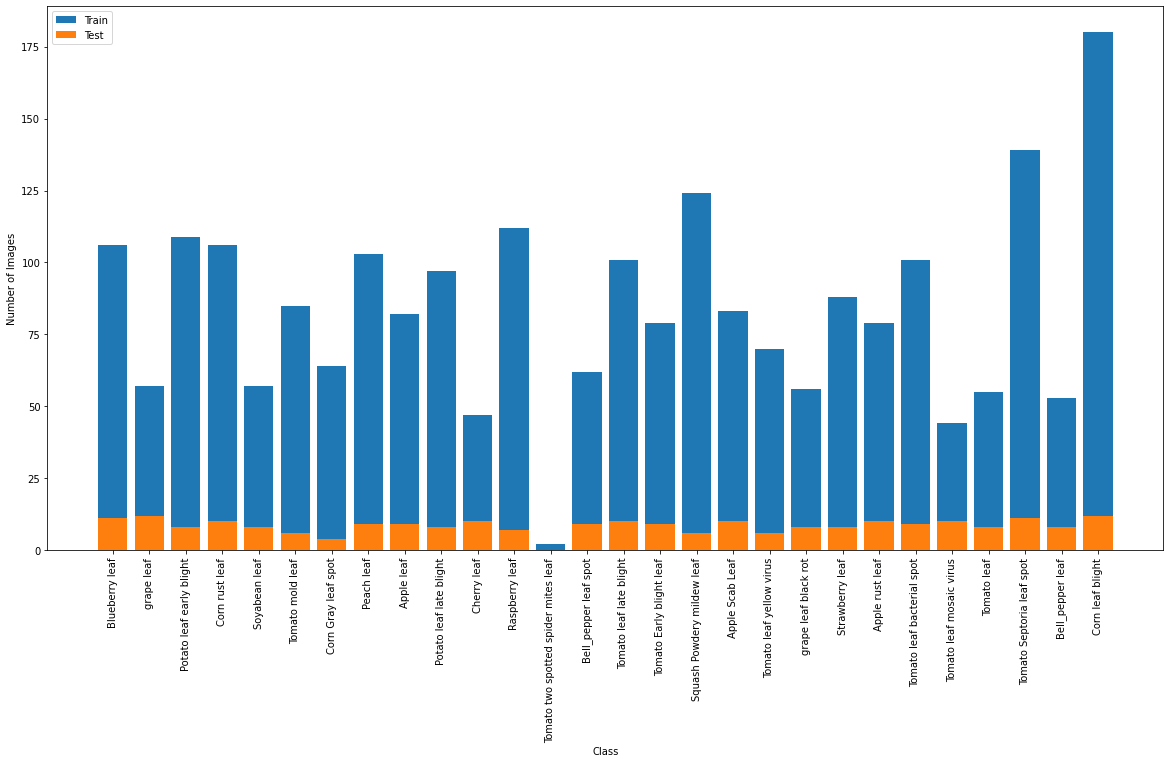

In [ ]:
def draw_histogram(data_list):
    train_data = [i for i in data_list if i[1] == 'train']
    test_data = [i for i in data_list if i[1] == 'test']
    
    train_classes = [i[2] for i in train_data]
    test_classes = [i[2] for i in test_data]
    
    train_counts = [i[0] for i in train_data]
    test_counts = [i[0] for i in test_data]
    
    plt.figure(figsize=(20,10))
    plt.bar(train_classes, train_counts, label='Train')
    plt.bar(test_classes, test_counts, label='Test')
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.legend()
    plt.xticks(rotation=90)
    plt.show()

draw_histogram(data)

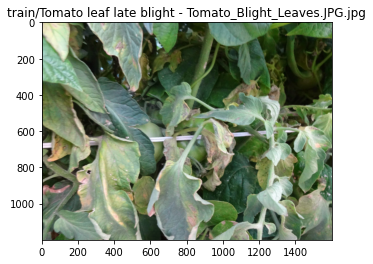

In [ ]:
import random, glob
import matplotlib.pyplot as plt

base_path = '/content/PlantDoc-Dataset-master'
# [ <num images>, <parent directory - either test or train>, directory name]

img_dir = random.choice([i[1] for i in data]) # randomly select a directory from the list
path_to_img_files = f"{base_path}/{img_dir}"
img_files = glob.glob(path_to_img_files + "/*.jp*g") # get all jpg and jpeg files in the directory
img_file = random.choice(img_files) # Randomly select

# ... rest of the code
img = plt.imread(img_file)
path = Path(img_file)
title = f"{path.parents[1].name}/{path.parent.name} - {path.name}"
plt.imshow(img)
plt.title(title)
plt.show()

### Explore Plant Leaf dataset


##### Download location
[Plant Leaf dataset](https://data.mendeley.com/datasets/tywbtsjrjv/1).  There does not seem to be a URL that will work to download via URL. So the first thing I'm doing:
- download Plant_leaf_diseases_datasets_without_augmentation.zip
- upload the file to my Google Drive
- connect up with my Google Drive
- upload the dataset into colab.

##### License
Creative Commons Attribution 4.0 International [Link](https://github.com/pratikkayal/PlantDoc-Dataset/blob/master/LICENSE.txt).

##### Attributes
J, ARUN PANDIAN; GOPAL, GEETHARAMANI (2019), “Data for: Identification of Plant Leaf Diseases Using a 9-layer Deep Convolutional Neural Network”, Mendeley Data, V1, doi: 10.17632/tywbtsjrjv.1

##### Paper
The [document](https://www.sciencedirect.com/science/article/abs/pii/S0045790619300023?via%3Dihub) is behind a paywall.  That's unfortunate.





## Import libraries

In [53]:
import zipfile
from pathlib import Path

## Connect to Google Drive

In [5]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [6]:
def extract(file_path) -> None:
    print(f"File path of zip file: {file_path}")
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall('/content/')


In [7]:
extract("/gdrive/MyDrive/Colab/Plant_leaf_diseases_dataset_without_augmentation.zip")

File path of zip file: /gdrive/MyDrive/Colab/Plant_leaf_diseases_dataset_without_augmentation.zip


The dataset has 39 different folders.  Each folder is named for the fruit__disease.  For example, one folder is Cherry____Powerdery_mildew.  Within each folder is 360 images.  The images are names names like image (1009).JPG ..which given I'm looking for jpg or jpeg messed me up for a moment. ☹  15 fruit types are listed.  One is "Background_without_leaves" which I don't understand the purpose.  But I didn't read the article because it is behind a paywall (see the last line of the print out).

Something I don't understand:
- 360 (number of images in each folder) * 39 (number of folders) =  14040
- the total number of images determined = 55447

why the difference?  I must be overwhelmed by so much data at this point.

In [54]:

import glob

# path to the dataset
dataset_path = Path('/content/Plant_leave_diseases_dataset_without_augmentation')
print(f"Dataset Path: {dataset_path}")

# get the number of folders in the dataset
folder_count = len([x for x in dataset_path.iterdir() if x.is_dir()])
print(f'Number of folders in the dataset: {folder_count}')

# get the different fruit types
jpg_files = [file for file in glob.glob('/content/Plant_leave_diseases_dataset_without_augmentation/*/*.[Jj][Pp]*[Gg]') if Path(file).parent.is_dir()]
print(f"Total Number of images: {len(jpg_files)}")

for x in dataset_path.iterdir():
  if x.is_dir():
    jpg_files = glob.glob('/content/Plant_leave_diseases_dataset_without_augmentation/Peach___healthy/*.[Jj][Pp]*[Gg]')
    print(f"Type of fruit and disease: {x.name} | Number of images: {len(jpg_files)}")

fruit_types = set([x.name.split('__')[0] for x in dataset_path.iterdir() if x.is_dir()])
print(f'Number of different fruit types: {len(fruit_types)}')
print(f'Fruit types: {fruit_types}')


Dataset Path: /content/Plant_leave_diseases_dataset_without_augmentation
Number of folders in the dataset: 39
Total Number of images: 55447
Type of fruit and disease: Cherry___Powdery_mildew | Number of images: 360
Type of fruit and disease: Tomato___Leaf_Mold | Number of images: 360
Type of fruit and disease: Peach___healthy | Number of images: 360
Type of fruit and disease: Potato___healthy | Number of images: 360
Type of fruit and disease: Strawberry___healthy | Number of images: 360
Type of fruit and disease: Apple___Black_rot | Number of images: 360
Type of fruit and disease: Apple___Apple_scab | Number of images: 360
Type of fruit and disease: Tomato___Bacterial_spot | Number of images: 360
Type of fruit and disease: Orange___Haunglongbing_(Citrus_greening) | Number of images: 360
Type of fruit and disease: Corn___Northern_Leaf_Blight | Number of images: 360
Type of fruit and disease: Strawberry___Leaf_scorch | Number of images: 360
Type of fruit and disease: Grape___Black_rot | 

Unfortunately, there is no train/test split. But that isn't hard to do.  I'm not plotting a histogram on the number of images since each folder contains the same count (of 360).

Let's look at some random images.

In [55]:
from pathlib import Path
# def walk_through_dir(dir_path):
#   """
#   Walks through dir_path returning its contents.
#   Args:
#     dir_path (str or pathlib.Path): target directory
  
#   Returns:
#     A print out of:
#       number of subdiretories in dir_path
#       number of images (files) in each subdirectory
#       name of each subdirectory
#   """
#   for dirpath, dirnames, filenames in os.walk(dir_path):
#     print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
import glob
def get_an_image(dir_path):

    data = []
    for dirpath in Path(dir_path).rglob('*'):
        print(f"{dirpath}")
        # if dirpath.is_dir():
        #     print(f"Dirpath.is_dir {dirpath}")
        #     path_to_images = dir_path + "/" + dirpath.parent.name + "/" + dirpath.name
        #     n_images_in_directory_at_path = len(glob.glob(path_to_images + "/*.jp*g"))
        #     if n_images_in_directory_at_path > 0:
        #       data.append([n_images_in_directory_at_path,  dirpath.parent.name + "/" + dirpath.name])
    return data

In [56]:
get_an_image('/content/Plant_leave_diseases_dataset_without_augmentation')

Streaming output truncated to the last 5000 lines.
/content/Plant_leave_diseases_dataset_without_augmentation/Peach___Bacterial_spot/image (1694).JPG
/content/Plant_leave_diseases_dataset_without_augmentation/Peach___Bacterial_spot/image (809).JPG
/content/Plant_leave_diseases_dataset_without_augmentation/Peach___Bacterial_spot/image (1455).JPG
/content/Plant_leave_diseases_dataset_without_augmentation/Peach___Bacterial_spot/image (625).JPG
/content/Plant_leave_diseases_dataset_without_augmentation/Peach___Bacterial_spot/image (434).JPG
/content/Plant_leave_diseases_dataset_without_augmentation/Peach___Bacterial_spot/image (303).JPG
/content/Plant_leave_diseases_dataset_without_augmentation/Peach___Bacterial_spot/image (1315).JPG
/content/Plant_leave_diseases_dataset_without_augmentation/Peach___Bacterial_spot/image (1387).JPG
/content/Plant_leave_diseases_dataset_without_augmentation/Peach___Bacterial_spot/image (229).JPG
/content/Plant_leave_diseases_dataset_without_augmentation/Peac

[]

In [67]:
import random
from pathlib import Path

dir_path = '/content/Plant_leave_diseases_dataset_without_augmentation'
# Get a random image from one of the folders.
img_file = random.choice([file for file in Path(dir_path).rglob('*') ])
print(img_file)

/content/Plant_leave_diseases_dataset_without_augmentation/Tomato___Target_Spot/image (1187).JPG


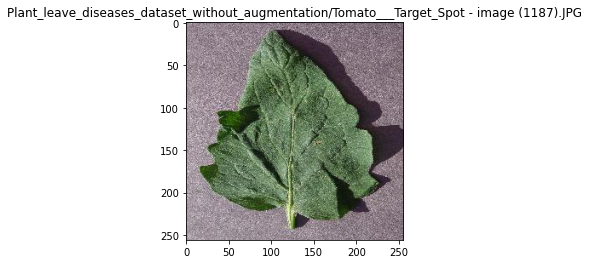

In [68]:
import matplotlib.pyplot as plt

img = plt.imread(img_file)
path = Path(img_file)
title = f"{path.parents[1].name}/{path.parent.name} - {path.name}"
plt.imshow(img)
plt.title(title)
plt.show()